<a href="https://colab.research.google.com/github/Lospaspas/DataScienceUNAB/blob/main/TRABAJO_FINAL_UNAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar los archivos y  Leer los archivos CSV
train_data  = pd.read_csv("train.csv",delimiter=",")
test_data = pd.read_csv("test.csv",delimiter=",")


# Display first few rows of the datasets and data types
train_info = train_data.info()
test_info = test_data.info()

train_head = train_data.head()
test_head = test_data.head()

(train_info, train_head, test_info, test_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244391 entries, 0 to 244390
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   substation   244391 non-null  object 
 1   date         244391 non-null  object 
 2   consumption  244391 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61313 entries, 0 to 61312
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   substation   61313 non-null  object 
 1   date         61313 non-null  object 
 2   consumption  61313 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


(None,
   substation                 date  consumption
 0    AJAHUEL  2018-01-01 00:00:00   137.330840
 1    AJAHUEL  2018-01-01 01:00:00   124.045549
 2    AJAHUEL  2018-01-01 02:00:00   118.137811
 3    AJAHUEL  2018-01-01 03:00:00   107.899499
 4    AJAHUEL  2018-01-01 04:00:00   100.362069,
 None,
   substation                 date  consumption
 0    AJAHUEL  2022-01-01 00:00:00   102.093131
 1    AJAHUEL  2022-01-01 01:00:00    82.379086
 2    AJAHUEL  2022-01-01 02:00:00    75.126780
 3    AJAHUEL  2022-01-01 03:00:00    69.140084
 4    AJAHUEL  2022-01-01 04:00:00    66.442176)

In [ ]:
# Convert 'date' column to datetime and set it as index for both datasets
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

# Verify the changes
train_data.head(), test_data.head()


(                    substation  consumption
 date                                       
 2018-01-01 00:00:00    AJAHUEL   137.330840
 2018-01-01 01:00:00    AJAHUEL   124.045549
 2018-01-01 02:00:00    AJAHUEL   118.137811
 2018-01-01 03:00:00    AJAHUEL   107.899499
 2018-01-01 04:00:00    AJAHUEL   100.362069,
                     substation  consumption
 date                                       
 2022-01-01 00:00:00    AJAHUEL   102.093131
 2022-01-01 01:00:00    AJAHUEL    82.379086
 2022-01-01 02:00:00    AJAHUEL    75.126780
 2022-01-01 03:00:00    AJAHUEL    69.140084
 2022-01-01 04:00:00    AJAHUEL    66.442176)

In [ ]:
# Check for missing values in both datasets
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

# Display the unique substation names to choose two for modeling
unique_substations_train = train_data['substation'].unique()
unique_substations_test = test_data['substation'].unique()

(train_missing, test_missing, unique_substations_train, unique_substations_test)


(substation     0
 consumption    0
 dtype: int64,
 substation     0
 consumption    0
 dtype: int64,
 array(['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA',
        'LOSALME'], dtype=object),
 array(['AJAHUEL', 'BUIN', 'CHENA', 'CNAVIA', 'ELSALTO', 'FLORIDA',
        'LOSALME'], dtype=object))

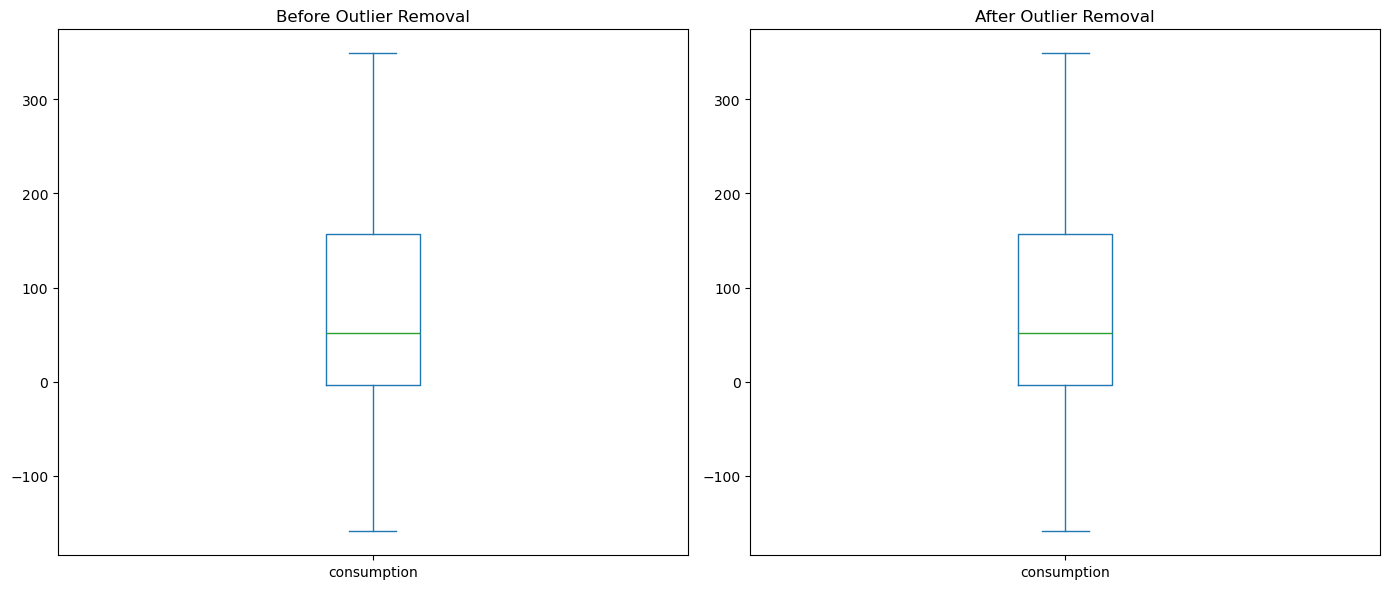

In [ ]:
# Filter the data to only include the selected substations: AJAHUEL and FLORIDA
stations_to_use = ['AJAHUEL', 'FLORIDA']
train_filtered = train_data[train_data['substation'].isin(stations_to_use)]
test_filtered = test_data[test_data['substation'].isin(stations_to_use)]


# Outlier detection and removal using IQR method for both stations
Q1 = train_filtered['consumption'].quantile(0.25)
Q3 = train_filtered['consumption'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers that fall outside 1.5 * IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


train_filtered_no_outliers = train_filtered[(train_filtered['consumption'] >= lower_bound) &
                                            (train_filtered['consumption'] <= upper_bound)]

# Plot the consumption data before and after removing outliers for each station
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Before outliers removal
plt.subplot(1, 2, 1)
train_filtered['consumption'].plot(kind='box', title='Before Outlier Removal')

# After outliers removal
plt.subplot(1, 2, 2)
train_filtered_no_outliers['consumption'].plot(kind='box', title='After Outlier Removal')

plt.tight_layout()
plt.show()

In [ ]:
# Seleccionar la columna de 'consumption' para la serie temporal
series = train_filtered_no_outliers['consumption']

In [ ]:
valores=train_filtered_no_outliers["consumption"].to_numpy()
x=[i for i in range(len(valores))]

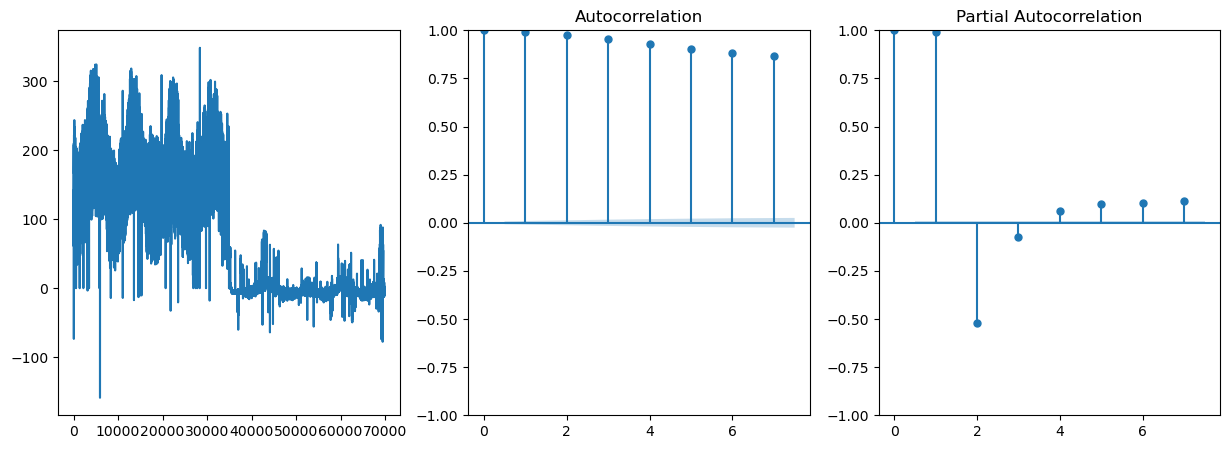

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

fig, axes=plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,valores)
plot_acf(valores,lags=7,ax=axes[1]);
plot_pacf(valores,lags=7,ax=axes[2]);

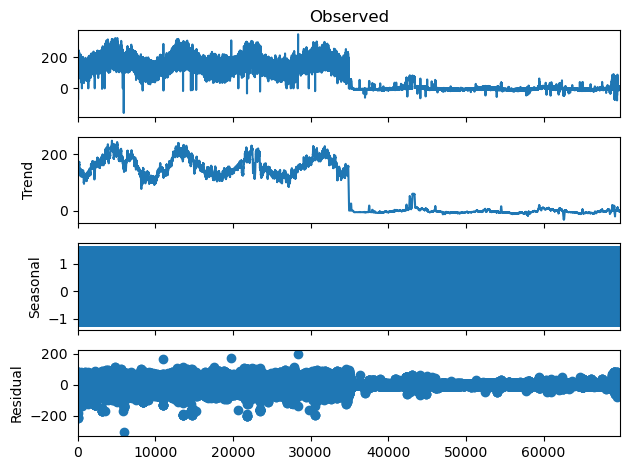

In [ ]:
result=seasonal_decompose(valores,model="additive",period=90)
result.plot();

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(valores,maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -30.571011
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


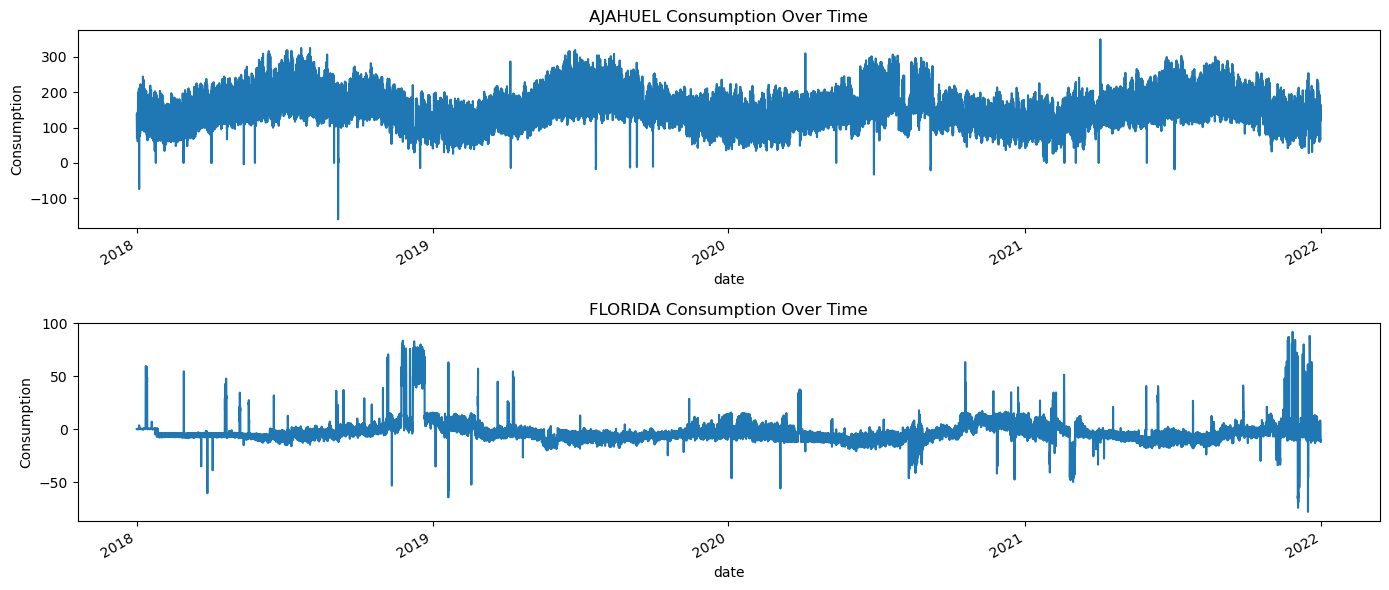

({'ADF Statistic': -10.329056267130232,
  'p-value': 2.8743538645887485e-18,
  'Critical Values': {'1%': -3.430537595926039,
   '5%': -2.861622912753126,
   '10%': -2.566814131854426}},
 {'ADF Statistic': -10.853850742806374,
  'p-value': 1.5049605377459977e-19,
  'Critical Values': {'1%': -3.4305376013078446,
   '5%': -2.8616229151316754,
   '10%': -2.5668141331204666}})

In [ ]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.dates as mdates

# Function to perform ADFuller test and return results
def adf_test(series):
    result = adfuller(series)
    return {'ADF Statistic': result[0], 'p-value': result[1], 'Critical Values': result[4]}

# Perform ADF test on the filtered dataset for each substation
adf_ajahuel = adf_test(train_filtered_no_outliers[train_filtered_no_outliers['substation'] == 'AJAHUEL']['consumption'])
adf_FLORIDA = adf_test(train_filtered_no_outliers[train_filtered_no_outliers['substation'] == 'FLORIDA']['consumption'])

# Plot the consumption over time for both substations to visually inspect seasonality
plt.figure(figsize=(14, 6))

# AJAHUEL consumption
plt.subplot(2, 1, 1)
train_filtered_no_outliers[train_filtered_no_outliers['substation'] == 'AJAHUEL']['consumption'].plot()
plt.title('AJAHUEL Consumption Over Time')
plt.ylabel('Consumption')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# FLORIDA consumption
plt.subplot(2, 1, 2)
train_filtered_no_outliers[train_filtered_no_outliers['substation'] == 'FLORIDA']['consumption'].plot()
plt.title('FLORIDA Consumption Over Time')
plt.ylabel('Consumption')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

(adf_ajahuel, adf_FLORIDA)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1091/1091 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0127
Epoch 2/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 7.2442e-04
Epoch 3/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 5.4234e-04
Epoch 4/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.3573e-04
Epoch 5/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.8825e-04
Epoch 6/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.3128e-04
Epoch 7/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 5.6047e-04
Epoch 8/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.0643e-04
Epoch 9/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 4.2880e-04
Epoch 10/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 4.7641e-04
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


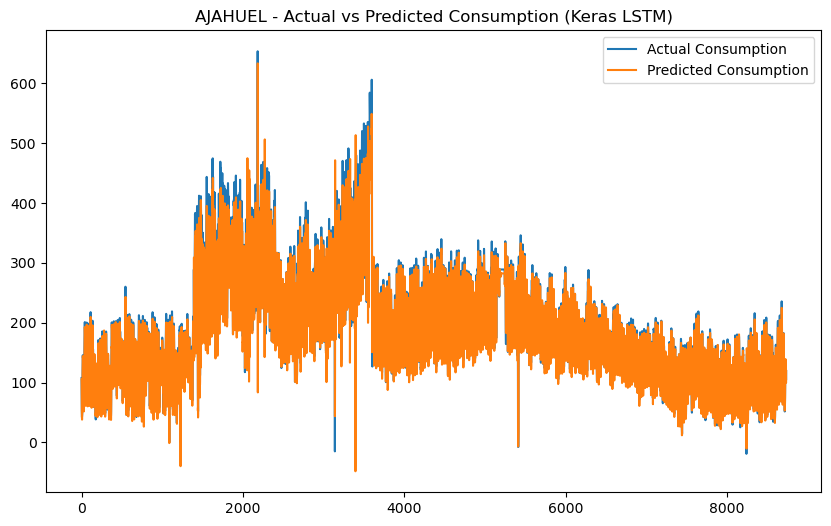

415.3857121725813

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Helper function to create sequences for time series forecasting
def create_sequences(data, time_steps=1):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        labels.append(data[i + time_steps])
    return np.array(sequences), np.array(labels)

# Use data from AJAHUEL for training Keras model
ajahuel_data = train_filtered_no_outliers[train_filtered_no_outliers['substation'] == 'AJAHUEL']['consumption'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ajahuel_data_scaled = scaler.fit_transform(ajahuel_data.reshape(-1, 1))

# Set time steps (window) for LSTM
time_steps = 24  # Using 24 hours as the time step for prediction

# Create sequences for training
X_train, y_train = create_sequences(ajahuel_data_scaled, time_steps)

# Reshape input to be 3D for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Define LSTM model for time series forecasting
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Prepare test data for predictions
ajahuel_test_data = test_filtered[test_filtered['substation'] == 'AJAHUEL']['consumption'].values
ajahuel_test_scaled = scaler.transform(ajahuel_test_data.reshape(-1, 1))

# Create sequences for test data
X_test, y_test = create_sequences(ajahuel_test_scaled, time_steps)

# Reshape input to be 3D for LSTM
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_scaled = model.predict(X_test)

# Inverse transform the scaled data back to original scale
predicted = scaler.inverse_transform(predicted_scaled)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse_keras = mean_squared_error(y_test_rescaled, predicted)

# Plot the real vs predicted values for AJAHUEL
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Consumption')
plt.plot(predicted, label='Predicted Consumption')
plt.title('AJAHUEL - Actual vs Predicted Consumption (Keras LSTM)')
plt.legend()
plt.show()

mse_keras

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


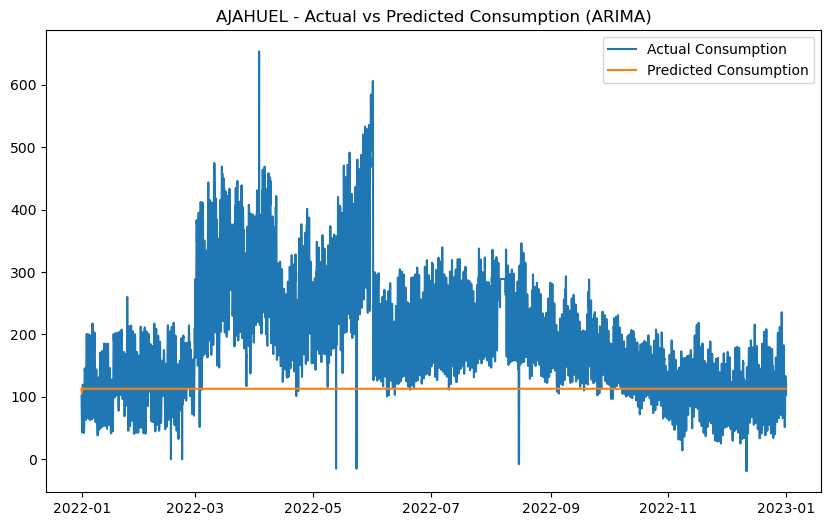

MSE for ARIMA: 16511.961552351047


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for ARIMA model (using AJAHUEL data)
ajahuel_train_data = train_filtered_no_outliers[train_filtered_no_outliers['substation'] == 'AJAHUEL']['consumption']
ajahuel_test_data = test_filtered[test_filtered['substation'] == 'AJAHUEL']['consumption']

# Fit the ARIMA model (start with a basic (p=5, d=1, q=0) configuration)
arima_model = ARIMA(ajahuel_train_data, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Make predictions on test data
start = len(ajahuel_train_data)
end = start + len(ajahuel_test_data) - 1
arima_predictions = arima_fit.predict(start=start, end=end, typ='levels')

# Calculate MSE for ARIMA
mse_arima = mean_squared_error(ajahuel_test_data, arima_predictions)

# Plot the real vs predicted values for ARIMA
plt.figure(figsize=(10, 6))
plt.plot(ajahuel_test_data.index, ajahuel_test_data, label='Actual Consumption')
plt.plot(ajahuel_test_data.index, arima_predictions, label='Predicted Consumption')
plt.title('AJAHUEL - Actual vs Predicted Consumption (ARIMA)')
plt.legend()
plt.show()

# Print the MSE
print(f'MSE for ARIMA: {mse_arima}')

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


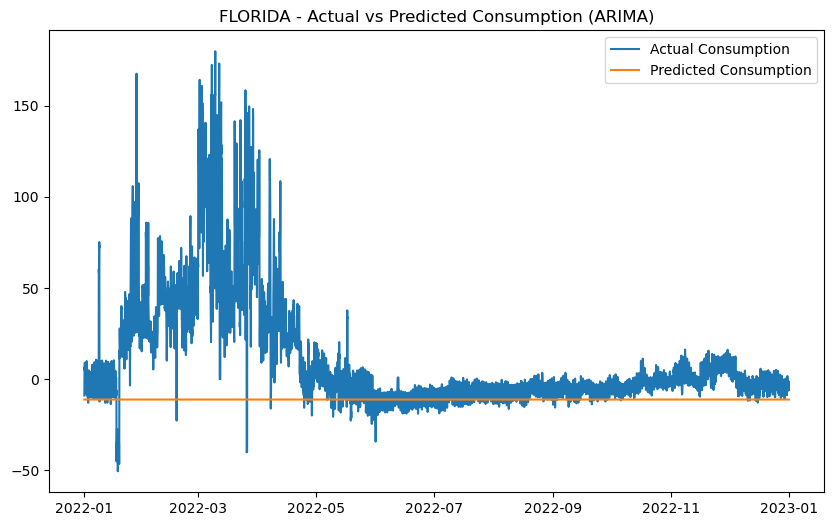

MSE for ARIMA FLORIDA: 1366.4293951355892


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Filter the data for FLORIDA
florida_train_data = train_filtered_no_outliers[train_filtered_no_outliers['substation'] == 'FLORIDA']['consumption']
florida_test_data = test_filtered[test_filtered['substation'] == 'FLORIDA']['consumption']

# Fit the ARIMA model for FLORIDA (p=5, d=1, q=0)
arima_model_florida = ARIMA(florida_train_data, order=(5, 1, 0))
arima_fit_florida = arima_model_florida.fit()

# Make predictions on test data for FLORIDA
start_florida = len(florida_train_data)
end_florida = start_florida + len(florida_test_data) - 1
arima_predictions_florida = arima_fit_florida.predict(start=start_florida, end=end_florida, typ='levels')

# Calculate MSE for ARIMA FLORIDA
mse_arima_florida = mean_squared_error(florida_test_data, arima_predictions_florida)

# Plot the real vs predicted values for ARIMA FLORIDA
plt.figure(figsize=(10, 6))
plt.plot(florida_test_data.index, florida_test_data, label='Actual Consumption')
plt.plot(florida_test_data.index, arima_predictions_florida, label='Predicted Consumption')
plt.title('FLORIDA - Actual vs Predicted Consumption (ARIMA)')
plt.legend()
plt.show()

# Print MSE for FLORIDA
print(f'MSE for ARIMA FLORIDA: {mse_arima_florida}')

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1091/1091 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0056
Epoch 2/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 8.4284e-04
Epoch 3/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 6.1359e-04
Epoch 4/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 5.9505e-04
Epoch 5/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 6.0897e-04
Epoch 6/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 6.3241e-04
Epoch 7/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 6.6698e-04
Epoch 8/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 5.9912e-04
Epoch 9/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 5.8081e-04
Epoch 10/10
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 6.0024e-04
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


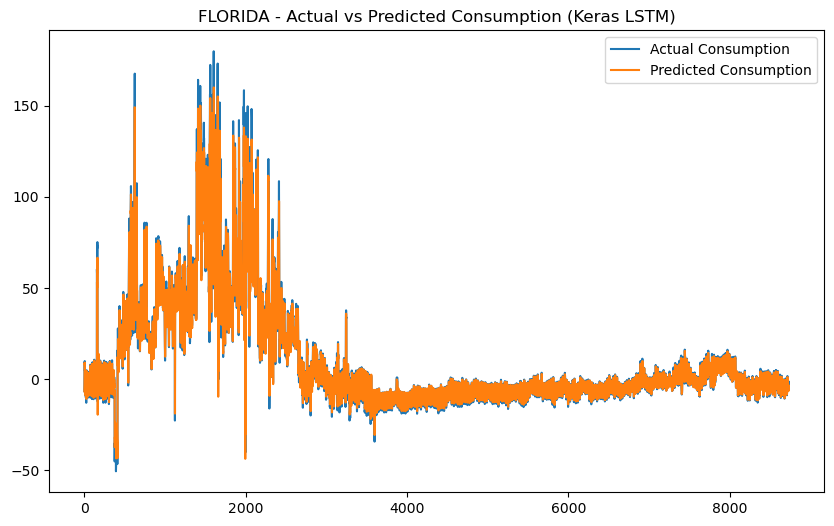

MSE for Keras LSTM FLORIDA: 40.13863796189808


In [ ]:
# Preparar los datos de FLORIDA para LSTM
florida_data = train_filtered_no_outliers[train_filtered_no_outliers['substation'] == 'FLORIDA']['consumption'].values

# Normalizar los datos
scaler_florida = MinMaxScaler(feature_range=(0, 1))
florida_data_scaled = scaler_florida.fit_transform(florida_data.reshape(-1, 1))

# Crear secuencias para entrenar el modelo
time_steps = 24  # Usamos 24 horas como ventana
X_train_florida, y_train_florida = create_sequences(florida_data_scaled, time_steps)

# Reshape para LSTM
X_train_florida = X_train_florida.reshape((X_train_florida.shape[0], X_train_florida.shape[1], 1))

# Definir el modelo LSTM
model_florida = Sequential()
model_florida.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model_florida.add(LSTM(50))
model_florida.add(Dense(1))
model_florida.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history_florida = model_florida.fit(X_train_florida, y_train_florida, epochs=10, batch_size=32, verbose=1)

# Preparar datos de test para FLORIDA
florida_test_data = test_filtered[test_filtered['substation'] == 'FLORIDA']['consumption'].values
florida_test_scaled = scaler_florida.transform(florida_test_data.reshape(-1, 1))

# Crear secuencias para el conjunto de prueba
X_test_florida, y_test_florida = create_sequences(florida_test_scaled, time_steps)

# Reshape para LSTM
X_test_florida = X_test_florida.reshape((X_test_florida.shape[0], X_test_florida.shape[1], 1))

# Predecir
predicted_scaled_florida = model_florida.predict(X_test_florida)

# Inverso de la transformación
predicted_florida = scaler_florida.inverse_transform(predicted_scaled_florida)
y_test_rescaled_florida = scaler_florida.inverse_transform(y_test_florida.reshape(-1, 1))

# Calcular el error MSE
mse_keras_florida = mean_squared_error(y_test_rescaled_florida, predicted_florida)

# Graficar resultados
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled_florida, label='Actual Consumption')
plt.plot(predicted_florida, label='Predicted Consumption')
plt.title('FLORIDA - Actual vs Predicted Consumption (Keras LSTM)')
plt.legend()
plt.show()

print(f"MSE for Keras LSTM FLORIDA: {mse_keras_florida}")